In [69]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
words = open('../dataset/names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [10]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [15]:
block_size = 3 # context length
X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size
    
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])

        context = context[1:] + [ix] # crop the first latter and append the one ahead

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [17]:
X.shape, Y.shape, X.dtype, Y.dtype

(torch.Size([32, 3]), torch.Size([32]), torch.int64, torch.int64)

In [20]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [22]:
C = torch.rand((27, 2))
C

tensor([[0.3229, 0.7459],
        [0.3204, 0.6386],
        [0.7159, 0.8892],
        [0.4156, 0.7040],
        [0.1160, 0.0299],
        [0.8790, 0.1160],
        [0.6731, 0.6735],
        [0.6363, 0.6873],
        [0.6101, 0.0808],
        [0.1732, 0.2006],
        [0.0301, 0.8121],
        [0.9094, 0.5033],
        [0.3327, 0.8181],
        [0.3731, 0.8226],
        [0.2618, 0.3873],
        [0.7068, 0.2900],
        [0.2119, 0.2677],
        [0.5422, 0.5946],
        [0.4434, 0.9632],
        [0.9237, 0.9008],
        [0.1595, 0.8789],
        [0.0381, 0.0772],
        [0.2151, 0.0597],
        [0.6294, 0.0514],
        [0.1176, 0.2957],
        [0.4325, 0.8694],
        [0.9811, 0.4930]])

In [35]:
C[torch.tensor([5, 6, 7, 7, 7])]

tensor([[0.8790, 0.1160],
        [0.6731, 0.6735],
        [0.6363, 0.6873],
        [0.6363, 0.6873],
        [0.6363, 0.6873]])

In [45]:
print(C[X].shape)
C[X]

torch.Size([32, 3, 2])


tensor([[[0.3229, 0.7459],
         [0.3229, 0.7459],
         [0.3229, 0.7459]],

        [[0.3229, 0.7459],
         [0.3229, 0.7459],
         [0.8790, 0.1160]],

        [[0.3229, 0.7459],
         [0.8790, 0.1160],
         [0.3731, 0.8226]],

        [[0.8790, 0.1160],
         [0.3731, 0.8226],
         [0.3731, 0.8226]],

        [[0.3731, 0.8226],
         [0.3731, 0.8226],
         [0.3204, 0.6386]],

        [[0.3229, 0.7459],
         [0.3229, 0.7459],
         [0.3229, 0.7459]],

        [[0.3229, 0.7459],
         [0.3229, 0.7459],
         [0.7068, 0.2900]],

        [[0.3229, 0.7459],
         [0.7068, 0.2900],
         [0.3327, 0.8181]],

        [[0.7068, 0.2900],
         [0.3327, 0.8181],
         [0.1732, 0.2006]],

        [[0.3327, 0.8181],
         [0.1732, 0.2006],
         [0.2151, 0.0597]],

        [[0.1732, 0.2006],
         [0.2151, 0.0597],
         [0.1732, 0.2006]],

        [[0.2151, 0.0597],
         [0.1732, 0.2006],
         [0.3204, 0.6386]],

    

In [43]:
print(X[6, 2])
C[X][6, 2] == C[15]

tensor(15)


tensor([True, True])

In [46]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [48]:
# Get the embeddings of the first character in X
emb[:, 0, :]

# Get the embeddings of the second character in X
emb[:, 1, :]

# Get the embeddings of the third character in X
emb[:, 2, :]


tensor([[0.3229, 0.7459],
        [0.8790, 0.1160],
        [0.3731, 0.8226],
        [0.3731, 0.8226],
        [0.3204, 0.6386],
        [0.3229, 0.7459],
        [0.7068, 0.2900],
        [0.3327, 0.8181],
        [0.1732, 0.2006],
        [0.2151, 0.0597],
        [0.1732, 0.2006],
        [0.3204, 0.6386],
        [0.3229, 0.7459],
        [0.3204, 0.6386],
        [0.2151, 0.0597],
        [0.3204, 0.6386],
        [0.3229, 0.7459],
        [0.1732, 0.2006],
        [0.9237, 0.9008],
        [0.3204, 0.6386],
        [0.7159, 0.8892],
        [0.8790, 0.1160],
        [0.3327, 0.8181],
        [0.3327, 0.8181],
        [0.3204, 0.6386],
        [0.3229, 0.7459],
        [0.9237, 0.9008],
        [0.7068, 0.2900],
        [0.2119, 0.2677],
        [0.6101, 0.0808],
        [0.1732, 0.2006],
        [0.3204, 0.6386]])

In [52]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [53]:
# An equivalent code
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [54]:
# Another equivalent code
emb.view(32, 6)

tensor([[0.3229, 0.7459, 0.3229, 0.7459, 0.3229, 0.7459],
        [0.3229, 0.7459, 0.3229, 0.7459, 0.8790, 0.1160],
        [0.3229, 0.7459, 0.8790, 0.1160, 0.3731, 0.8226],
        [0.8790, 0.1160, 0.3731, 0.8226, 0.3731, 0.8226],
        [0.3731, 0.8226, 0.3731, 0.8226, 0.3204, 0.6386],
        [0.3229, 0.7459, 0.3229, 0.7459, 0.3229, 0.7459],
        [0.3229, 0.7459, 0.3229, 0.7459, 0.7068, 0.2900],
        [0.3229, 0.7459, 0.7068, 0.2900, 0.3327, 0.8181],
        [0.7068, 0.2900, 0.3327, 0.8181, 0.1732, 0.2006],
        [0.3327, 0.8181, 0.1732, 0.2006, 0.2151, 0.0597],
        [0.1732, 0.2006, 0.2151, 0.0597, 0.1732, 0.2006],
        [0.2151, 0.0597, 0.1732, 0.2006, 0.3204, 0.6386],
        [0.3229, 0.7459, 0.3229, 0.7459, 0.3229, 0.7459],
        [0.3229, 0.7459, 0.3229, 0.7459, 0.3204, 0.6386],
        [0.3229, 0.7459, 0.3204, 0.6386, 0.2151, 0.0597],
        [0.3204, 0.6386, 0.2151, 0.0597, 0.3204, 0.6386],
        [0.3229, 0.7459, 0.3229, 0.7459, 0.3229, 0.7459],
        [0.322

In [55]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
# Building the hidden layer
layer = emb.view(emb.shape[0], 6) @ W1 + b1
h = torch.tanh(layer)
print(h.shape)
h

torch.Size([32, 100])


tensor([[-0.8710, -0.8080, -0.9792,  ...,  0.7530, -0.9335,  0.6998],
        [-0.8634, -0.9508, -0.9008,  ...,  0.9861, -0.9760,  0.0939],
        [-0.9677, -0.5306, -0.9728,  ...,  0.0239, -0.9905,  0.9492],
        ...,
        [-0.7245, -0.8924, -0.6479,  ...,  0.9288, -0.9953,  0.4465],
        [-0.9413, -0.5811, -0.8762,  ...,  0.1292, -0.9773,  0.6158],
        [-0.6318, -0.7171, -0.7648,  ...,  0.5463, -0.9919,  0.3958]])

In [62]:
# Building the final layer
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

logits = h @ W2 + b2

In [63]:
logits.shape

torch.Size([32, 27])

In [64]:
# Fake counts
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)

In [65]:
prob.shape

torch.Size([32, 27])

In [120]:
block_size = 3 # context length
X, Y = [], []

for w in words:
    context = [0] * block_size
    
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])

        context = context[1:] + [ix] # crop the first latter and append the one ahead

X = torch.tensor(X)
Y = torch.tensor(Y)

In [122]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [123]:
# Summarizing our above approach
g = torch.Generator().manual_seed(2147483647) # To generate same random numbers everytime

C = torch.randn((27, 2), generator=g)

W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)

W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [ ]:
# Iterations...
for _ in range(10000):
    # minibatch
    ix = torch.randint(0, X.shape[0], (1000,))

    # Forward Pass
    emb = C[X[ix]] # shape = (32, 3, 2)
    hidden_layer = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1) # shape = (32, 100)
    logits = hidden_layer @ W2 + b2 # shape = (32, 27)

    loss = F.cross_entropy(logits, Y[ix])
    print("Loss: ", loss.item())

    # Backward Pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # Update
    for p in parameters:
        p.data += -0.1 * p.grad

In [ ]:
## Finding a better learning rate
learning_rates = torch.linspace(-3, 0, 1000)
learning_rates = 10 ** learning_rates
learning_rates

In [201]:
# Summarizing our above approach
g = torch.Generator().manual_seed(2147483647) # To generate same random numbers everytime

C = torch.randn((27, 2), generator=g)

W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)

W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [ ]:
# Iterations...
lri = []
lossi = []

for li in range(1000):
    # minibatch
    ix = torch.randint(0, X.shape[0], (32,))

    # Forward Pass
    emb = C[X[ix]] # shape = (32, 3, 2)
    hidden_layer = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1) # shape = (32, 100)
    logits = hidden_layer @ W2 + b2 # shape = (32, 27)

    loss = F.cross_entropy(logits, Y[ix])
    print("Loss: ", loss.item())

    # Backward Pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # Update
    for p in parameters:
        p.data += -learning_rates[li] * p.grad
    
    lri.append(learning_rates[li].item())
    lossi.append(loss.item())

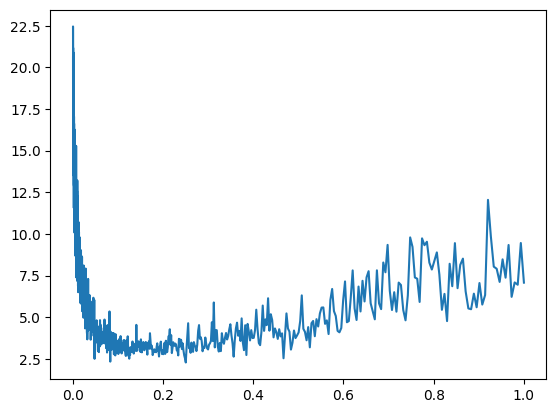

In [203]:
plt.plot(lri, lossi)
#print(lossi)

In [ ]:
# Hence we have a decent learning rate at 0.1

In [303]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

def build_dataset(words):
    block_size = 3 # context length
    X, Y = [], []

    for w in words:
        context = [0] * block_size
        
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])

            context = context[1:] + [ix] # crop the first latter and append the one ahead
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)

    return X, Y


import random
random.seed(42)
random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])


In [304]:
Xtr.shape, Xdev.shape, Xtest.shape

(torch.Size([182424, 3]), torch.Size([22836, 3]), torch.Size([22886, 3]))

In [310]:
g = torch.Generator().manual_seed(2147483647) # To generate same random numbers everytime

C = torch.randn((27, 2), generator=g)

W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)

W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

sum(p.nelement() for p in parameters)

3481

In [311]:
# Iterations...
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(200000):
    # minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # Forward Pass
    emb = C[Xtr[ix]] # shape = (32, 3, 2)
    hidden_layer = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1) # shape = (32, 100)
    logits = hidden_layer @ W2 + b2 # shape = (32, 27)

    loss = F.cross_entropy(logits, Ytr[ix])
    print("Loss: ", loss.item())

    # Backward Pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # Update
    lr = 0.01 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    stepi.append(i)
    lossi.append(loss.log10().item())

200000

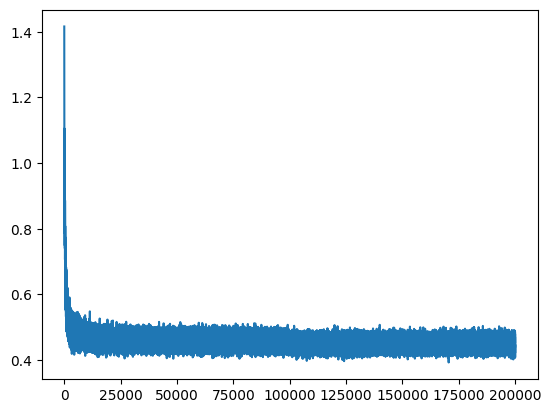

In [295]:
plt.plot(stepi, lossi)
len(lossi)

In [ ]:
# Visualizing our 2d embeddings
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)

for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center', va='center', color='white')

plt.grid('minor')

In [316]:
# Evaluating dev loss
emb = C[Xdev] # shape = (len(Xdev[0]), 3, 2)
hidden_layer = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1) # shape = (len(Xdev[0]), 100)
logits = hidden_layer @ W2 + b2 # shape = (len(Xdev[0]), 27)

loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.8276, grad_fn=<NllLossBackward0>)

In [318]:
# Sampling words

result = []

for _ in range(20):
    block = [0] * block_size
    pred_word = []
    while True:
        Xt = torch.tensor([block])

        # Forward Pass
        embed = C[Xt] # shape = (1, 3, 2)
        hidden_layer = torch.tanh(embed.view(embed.shape[0], 6) @ W1 + b1) # shape = (32, 100)
        logits = hidden_layer @ W2 + b2 # shape = (32, 27)

        counts = torch.exp(logits)
        prob = counts / counts.sum(1, keepdims=True)

        pred_target = torch.multinomial(prob, num_samples=1, replacement=True, generator=g)
        pred_character = itos[pred_target.item()]
        # print(pred_character)

        if pred_character == '.':
            break

        pred_word.append(pred_character)
        block = block[1:] + [pred_target.item()]

    result.append(''.join(pred_word))

result




['aynecrknts',
 'ila',
 'lla',
 'aodairnvcnybai',
 'ayaeeaisiaoedmamavwnaeaanaaesyna',
 'akh',
 'rhijymnaayruhy',
 '',
 'slinlciikda',
 'a',
 'mma',
 'els',
 'keenal',
 'a',
 'eyn',
 '',
 'ey',
 'ajaa',
 'marniua',
 'rscak']